In [1]:
!pip install seaborn

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 292 kB 2.2 MB/s            


In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

np.set_printoptions(precision=3, suppress=True)

In [5]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2022-01-17 00:11:15.667876: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/ubuntu/catkin_ws/devel/lib:/opt/ros/noetic/lib
2022-01-17 00:11:15.667923: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


2.6.0


In [6]:
df = pd.read_csv('training_data.csv')

In [7]:
df.head()

,base_speed,distance_from_wall,rotation_angle,distance_setpoint,docking_time,docking_distance
0,2.8,399.134182,0.030760,500.0,11.733102,1836.0
1,2.8,763.788272,0.041003,500.0,7.800361,1266.0
2,2.8,919.541755,0.005128,500.0,18.480375,2830.0
3,2.8,266.442650,-0.005128,500.0,15.054149,2356.0
4,2.8,707.218416,0.076772,500.0,6.391310,1090.0


In [10]:
train_dataset = df.sample(frac=0.8, random_state=0)
test_dataset = df.drop(train_dataset.index)

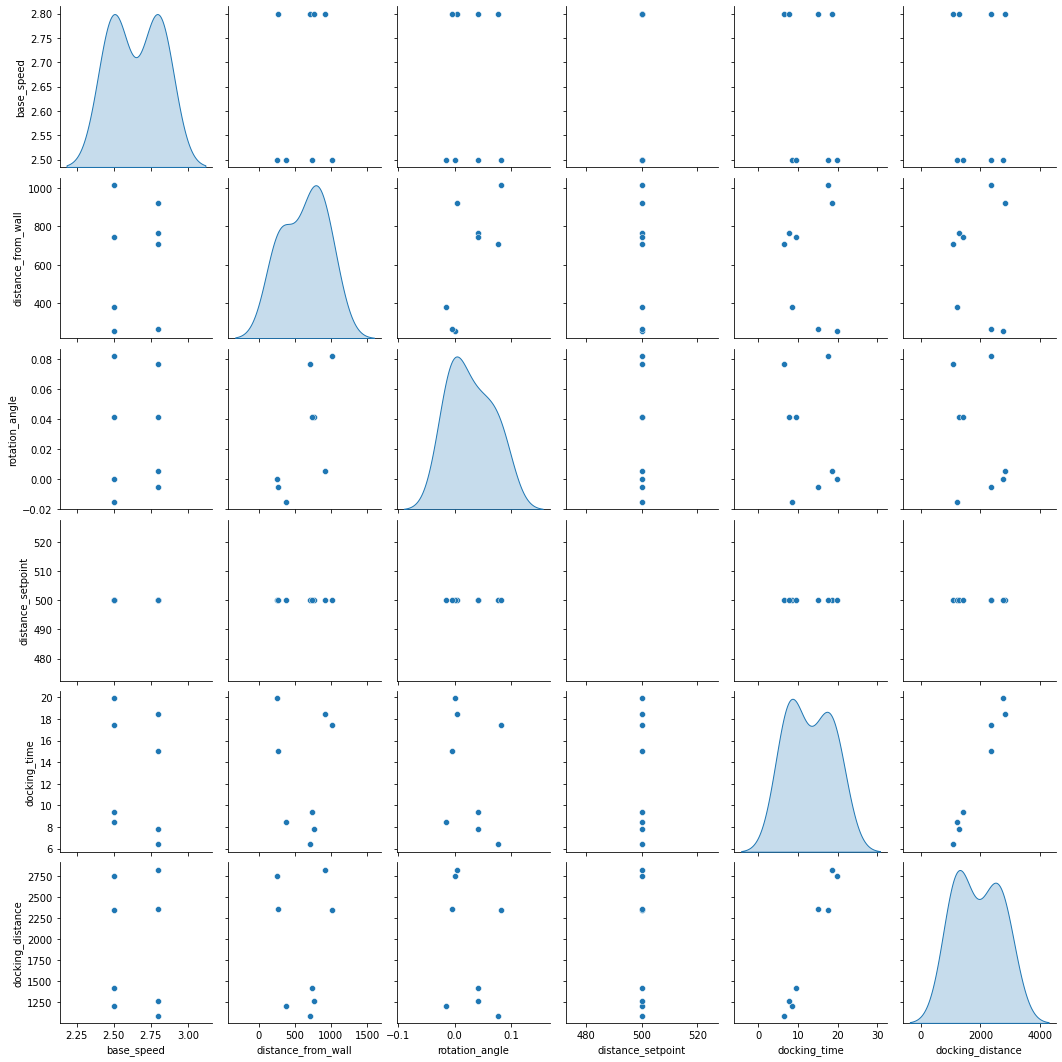

In [12]:
plot=sns.pairplot(train_dataset[['base_speed', 
                            'distance_from_wall', 
                            'rotation_angle', 
                            'distance_setpoint', 
                            'docking_time', 
                            'docking_distance']], 
                            diag_kind='kde'
                            )

In [17]:
plot.savefig('/images/seaborn.png')

FileNotFoundError: [Errno 2] No such file or directory: '/images/seaborn.png'

In [18]:
train_dataset.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
base_speed,8.0,2.650000,0.160357,2.500000,2.500000,2.650000,2.800000,2.800000
distance_from_wall,8.0,632.192293,292.917048,258.000000,354.080491,725.511749,802.726643,1015.449061
rotation_angle,8.0,0.028158,0.037617,-0.015383,-0.001282,0.023065,0.049945,0.081868
distance_setpoint,8.0,500.000000,0.000000,500.000000,500.000000,500.000000,500.000000,500.000000
docking_time,8.0,12.865340,5.437762,6.391310,8.265750,12.210340,17.743773,19.910878
docking_distance,8.0,1909.750000,734.195138,1090.000000,1252.000000,1883.000000,2457.000000,2830.000000


In [24]:
train_features = train_dataset.copy()
test_features = test_dataset.copy()

train_labels = train_features.pop('docking_distance')
t=train_features.pop('docking_time')

test_labels = test_features.pop('docking_distance')
t=test_features.pop('docking_time')

# Normalization

In [25]:
train_dataset.describe().transpose()[['mean', 'std']]

,mean,std
base_speed,2.650000,0.160357
distance_from_wall,632.192293,292.917048
rotation_angle,0.028158,0.037617
distance_setpoint,500.000000,0.000000
docking_time,12.865340,5.437762
docking_distance,1909.750000,734.195138


In [ ]:
normalizer = tf.keras.layers.Normalization(axis=-1)